In [1]:
from google.colab import files 
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math 

In [9]:
df=pd.read_csv('cancer.csv',index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.drop(['diagnosis'], 1)
data = np.array(df.astype(float))

In [10]:
#Utility Methods
#Prints point based on radius and texture mean
def printpoint(point):
	print(point[0],point[1])
	print()

#Prints mediod based on radius and texture mean
def printmediod(medoids):
	print()
	for i in medoids:
		printpoint(medoids[i])

#Computes updated cost and cluster points
def get_new_cost(data,medoids):
	cost=0
	clusters={}
	for i in range(len(medoids)):
		clusters[i]=[]
	for x in data:
		dist=[]
		for m_ind in medoids:
			dist.append(np.linalg.norm(x-medoids[m_ind]))

		c_ind=dist.index(min(dist))
		cost+=dist[c_ind]
		clusters[c_ind].append(x)

	return clusters,cost

#Checks if point is member of mediod list or not
def m_member(point,medoids):
	for i in medoids:
		compare=medoids[i]==point
		if compare.all()==True:
			return True
	return False


In [14]:
class K_medoid:
	def __init__(self,k,it):
		self.k=k
		self.medoids={}
		self.max_itration=it

	def fit(self,data):
		print("Start")
		index = np.random.choice(data.shape[0], self.k, replace=False)
		#Randomly selecting two points as initial medoids
		for i in range(self.k):
			self.medoids[i]=data[index[i]]

		#Initializing clusters 
		self.clusters={}
		for i in range(self.k):
			self.clusters[i]=[]


		cost=0
		no_swaps=0
		for x in data:
			dist=[]
			for m in self.medoids:
				dist.append(np.linalg.norm(x-self.medoids[m]))#Using Eucleadean distance as distance function
			c_ind=dist.index(min(dist))
			cost+=dist[c_ind]
			self.clusters[c_ind].append(x)

		for it in range(self.max_itration):
			#Choosing random non mediod point
			flag=True
			while(flag):
				index = np.random.choice(data.shape[0], 1, replace=False)
				point=data[index[0]]
				if not (m_member(point,self.medoids)):
					flag=False

			
			best_medoids={}
			best_cluster={}
			swapped=False
			for m_ind in self.medoids:
				temp_medoids=self.medoids.copy()
				temp_medoids[m_ind]=point #Temporary swapping new point in medoids 
				temp_clusters,temp_cost=get_new_cost(data,temp_medoids)
				#For the least cost mediod we store as best mediod
				if temp_cost<cost:
					cost=temp_cost
					best_medoids=temp_medoids.copy()
					best_cluster=temp_clusters.copy()
					swapped=True

			if swapped==True:
				no_swaps=0
				self.medoids=best_medoids.copy()
				self.clusters=best_cluster.copy()
			else:
				no_swaps+=1

			#Self-devised Terminating Condtions
			if no_swaps>=5:
				print("No. of Iterations "+str(it))
				break

			
			if it == (self.max_itration-1):
				print("Reached Maximum Number of Iterations")


	def plot(self):

		colors=["c","b"]
		#Plotting the cluster points
		for c_ind in self.clusters:
			for point in self.clusters[c_ind]:
				plt.scatter(point[0], point[1],
				marker="o", color=colors[c_ind], s=2)
		#Plotting the centroids
		for c in self.medoids:
			plt.scatter(self.medoids[c][0], self.medoids[c][1],
				marker="o", color="r",s=20)
		plt.xlabel('radius_mean')
		plt.ylabel('texture_mean')
		plt.show()

	def details(self):
		print("No. of Points in each cluster : ")
		for c_ind in self.clusters:
			print(str(len(self.clusters[c_ind]))+" ",end="")
		print()


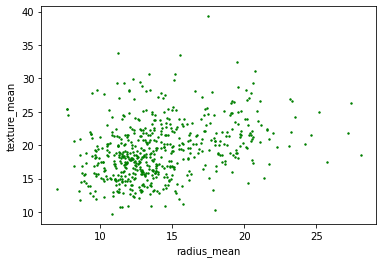

In [12]:
#Plotting all the data points
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
for point in data:
	plt.scatter(point[0],point[1],color='g',marker="o",s=2)
plt.show()

In [15]:
model=K_medoid(2,30) #K=2, Max_Iterations
model.fit(data)
model.details()

Start
No. of Iterations 11
No. of Points in each cluster : 
137 432 


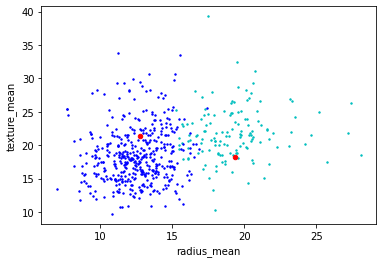

In [16]:
model.plot()